
Distance Measure: 1
Silhouette score for Cluster 0: 0.21547451035524282
Silhouette score for Cluster 1: 0.2493923650866605
Number of Clusters: 2, Overall Silhouette Score: 0.23195795377611872
Silhouette score for Cluster 0: 0.20798061955627956
Silhouette score for Cluster 1: 0.2722018216796816
Silhouette score for Cluster 2: 0.4160374725347923
Number of Clusters: 3, Overall Silhouette Score: 0.24771280994004277
Silhouette score for Cluster 0: 0.22032234223093025
Silhouette score for Cluster 1: 0.07476685422442958
Silhouette score for Cluster 2: 0.3498175810491575
Silhouette score for Cluster 3: 0.41405947295224416
Number of Clusters: 4, Overall Silhouette Score: 0.2023378808597985
Silhouette score for Cluster 0: 0.06034570839143119
Silhouette score for Cluster 1: 0.18411147153856963
Silhouette score for Cluster 2: 0.34645278953256586
Silhouette score for Cluster 3: 0.380884246138291
Silhouette score for Cluster 4: 0.4394319941886701
Number of Clusters: 5, Overall Silhouette Score: 0.1

C:\Users\User\AppData\Local\Temp\ipykernel_10836\4282743126.py:134: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax2.scatter(
C:\Users\User\AppData\Local\Temp\ipykernel_10836\4282743126.py:134: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax2.scatter(


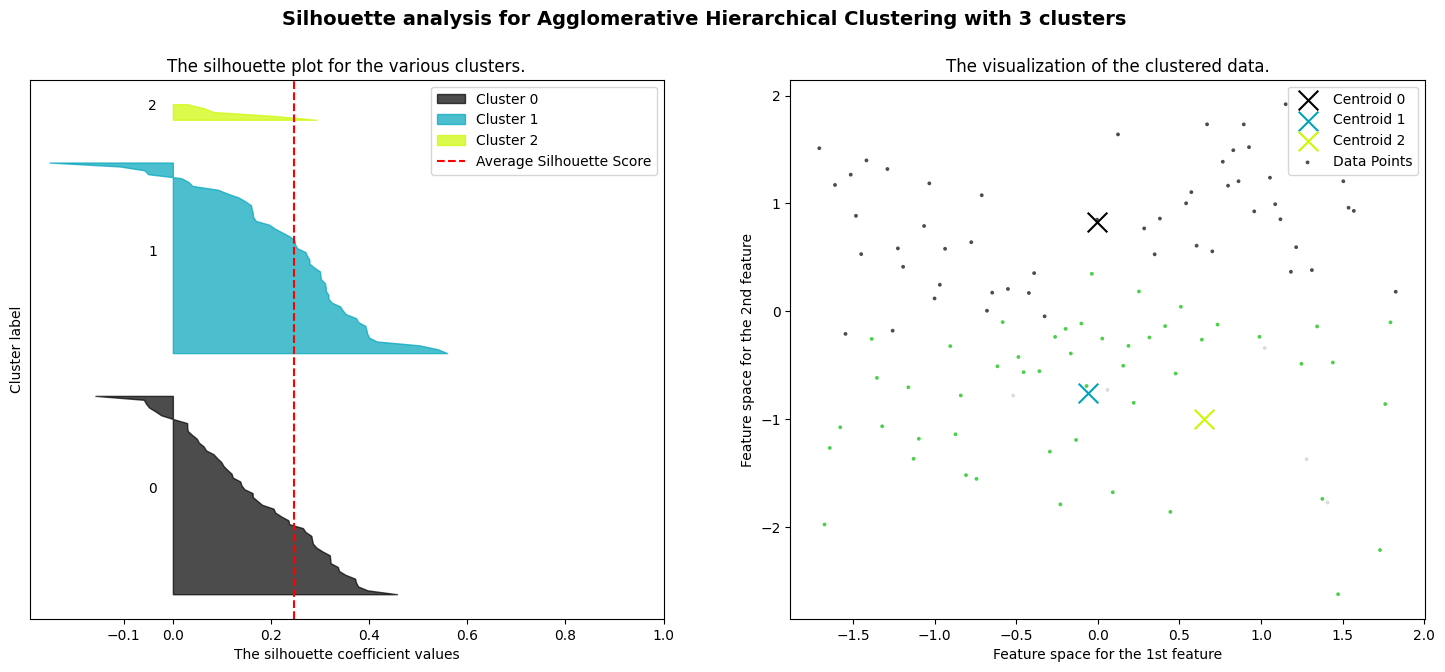

In [9]:
import math
import numpy as np
import csv
import matplotlib.pyplot as plt

def distance(p, q):
    return math.sqrt(sum([(pi - qi)**2 for pi, qi in zip(p, q)]))

def single_link(ci, cj):
    return min([distance(vi, vj) for vi in ci for vj in cj])

def complete_link(ci, cj):
    return max([distance(vi, vj) for vi in ci for vj in cj])

def average_link(ci, cj):
    distances = [distance(vi, vj) for vi in ci for vj in cj]
    return sum(distances) / len(distances)

def get_distance_measure(M):
    if M == 0:
        return single_link
    elif M == 1:
        return complete_link
    else:
        return average_link

class AgglomerativeHierarchicalClustering:
    def __init__(self, data, K, M):
        self.data = data
        self.N = len(data)
        self.K = K
        self.measure = get_distance_measure(M)
        self.clusters = self.init_clusters()

    def init_clusters(self):
        return {data_id: [data_point] for data_id, data_point in enumerate(self.data)}

    def find_closest_clusters(self):
        min_dist = math.inf
        closest_clusters = None

        clusters_ids = list(self.clusters.keys())

        for i, cluster_i in enumerate(clusters_ids[:-1]):
            for j, cluster_j in enumerate(clusters_ids[i+1:]):
                dist = self.measure(self.clusters[cluster_i], self.clusters[cluster_j])
                if dist < min_dist:
                    min_dist, closest_clusters = dist, (cluster_i, cluster_j)
        return closest_clusters

    def merge_and_form_new_clusters(self, ci_id, cj_id):
        new_clusters = {0: self.clusters[ci_id] + self.clusters[cj_id]}

        for cluster_id in self.clusters.keys():
            if (cluster_id == ci_id) | (cluster_id == cj_id):
                continue
            new_clusters[len(new_clusters.keys())] = self.clusters[cluster_id]
        return new_clusters

    def run_algorithm(self):
        while len(self.clusters.keys()) > self.K:
            closest_clusters = self.find_closest_clusters()
            self.clusters = self.merge_and_form_new_clusters(*closest_clusters)

    def calculate_silhouette_scores(self):
        silhouette_scores_per_cluster = []
        silhouette_values = []

        for cluster_id, points in self.clusters.items():
            if len(points) > 1:
                silhouette_avg, silhouette_vals = self.calculate_silhouette_for_cluster(points, cluster_id)
                silhouette_scores_per_cluster.append(silhouette_avg)
                silhouette_values.extend(silhouette_vals)
                print(f"Silhouette score for Cluster {cluster_id}: {silhouette_avg}")

        return silhouette_values


    def calculate_silhouette_for_cluster(self, cluster_points, cluster_id):
        silhouette_values = []
        for i, point_i in enumerate(cluster_points):
            a_i = np.mean([distance(point_i, point_j) for j, point_j in enumerate(cluster_points) if i != j])

            b_i_values = []
            for other_cluster_id, other_cluster_points in self.clusters.items():
                if other_cluster_id != cluster_id:
                    b_i_values.append(np.mean([distance(point_i, point_j) for point_j in other_cluster_points]))

            b_i = min(b_i_values) if b_i_values else 0

            silhouette_i = (b_i - a_i) / max(a_i, b_i)
            silhouette_values.append(silhouette_i)

        silhouette_avg = np.mean(silhouette_values)
        return silhouette_avg, silhouette_values
    def silhouette_analysis_plot(self, all_silhouette_values):
        silhouette_values = agg_hierarchical_clustering.calculate_silhouette_scores()
        # Calculate overall silhouette score
        num_clusters = len(self.clusters)

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

        y_lower = 10
        all_silhouette_vals = []

        for i, (cluster_id, points) in enumerate(self.clusters.items()):
            silhouette_vals = all_silhouette_values[i * len(points): (i + 1) * len(points)]
            all_silhouette_vals.extend(silhouette_vals)
            silhouette_vals = np.array(silhouette_vals)

            sorted_indices = np.argsort(silhouette_vals)[::-1]
            silhouette_vals = silhouette_vals[sorted_indices]
            size_cluster_i = silhouette_vals.size

            y_upper = y_lower + size_cluster_i

            color = plt.cm.nipy_spectral(float(cluster_id) / num_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                silhouette_vals,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
                label=f'Cluster {cluster_id}',  # Add label for each cluster
            )

            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(cluster_id))
            y_lower = y_upper + 10

            # Calculate and plot centroid
            centroid = np.mean(points, axis=0)
            ax2.scatter(
                centroid[0],
                centroid[1],
                marker="x",
                c=color,  # Set color of "x" symbol to the cluster color
                s=200,
                edgecolor="k",
                label=f'Centroid {cluster_id}',  # Add label for centroid
            )

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        silhouette_avg = np.mean(silhouette_values) if silhouette_values else 0
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--", label='Average Silhouette Score')

        ax1.set_yticks([])  # Clear the y-axis labels/ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        colors = plt.cm.nipy_spectral(np.linspace(0, 1, len(self.clusters)))

        all_data_points = np.concatenate([np.array(points) for points in self.clusters.values()])
        all_cluster_ids = np.concatenate([[cluster_id] * len(points) for cluster_id, points in self.clusters.items()])

        ax2.scatter(
            all_data_points[:, 0],
            all_data_points[:, 1],
            marker=".",
            s=30,
            lw=0,
            alpha=0.7,
            c=all_cluster_ids,
            cmap=plt.cm.nipy_spectral,
            edgecolor="k",
            label='Data Points'  # Add label for data points
        )

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            f"Silhouette analysis for Agglomerative Hierarchical Clustering with {num_clusters} clusters",
            fontsize=14,
            fontweight="bold",
        )

        ax1.legend(loc='upper right')  # Add legend to silhouette plot
        ax2.legend(loc='upper right')  # Add legend to visualization plot

        plt.show()

    
    def save_results_to_csv(self, output_file_path, output_file_path_cluster, silhouette_values):
        # Save the result file
        with open(output_file_path, 'w', newline='') as csvfile:
            csv_writer = csv.writer(csvfile)
            csv_writer.writerow(["Cluster_ID", "Silhouette_Score", "Avg_Silhouette_Score"])

            for i, (cluster_id, points) in enumerate(self.clusters.items()):
                if len(points) > 1:
                    silhouette_avg, silhouette_vals = self.calculate_silhouette_for_cluster(points, cluster_id)
                    csv_writer.writerow([i, silhouette_avg, None])
            silhouette_scores_per_cluster = []
            silhouette_scores_per_cluster.extend(silhouette_values)
            avg_silhouette_score = np.mean(silhouette_values)
            csv_writer.writerow([None, None, avg_silhouette_score])

            # Save the cluster file
       # Save the cluster file
        with open(output_file_path_cluster, 'w', newline='') as csvfile_cluster:
            csv_writer_cluster = csv.writer(csvfile_cluster)
            csv_writer_cluster.writerow(["ID", "Intra", "Inter", "Proximity", "RoG", "Cluster"])

            for cluster_id, points in self.clusters.items():
                for point in points:
                    original_data_point_id = point[0]  # Assuming the original data point ID is the first element in the data point
                    row_data = list(point) + [cluster_id]
                    csv_writer_cluster.writerow(row_data)

def read_data(file_name, separator=','):
    data = []
    with open(file_name) as input_file:
        next(input_file)  # Skip the header row
        for row in input_file.readlines():
            data.append([float(item) for item in row.strip().split(separator)])
    return data

# Example usage:
file_path = '../dataset/BeforeDS.csv'
# Read data from the CSV file
data = read_data(file_path)
normalized_data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

# Set a range of cluster numbers to try
num_clusters_range = [2, 3, 4, 5, 6, 7, 8, 9, 10]
distance_measure_range = [1]

# Initialize variables to store silhouette scores
max_silhouette_score = -1
optimal_num_clusters = None
optimal_distance_measure = None

for distance_measure in distance_measure_range:
    print(f"\nDistance Measure: {distance_measure}")

    for num_clusters in num_clusters_range:
        # Initialize and run the clustering algorithm
        agg_hierarchical_clustering = AgglomerativeHierarchicalClustering(normalized_data, num_clusters, distance_measure)
        agg_hierarchical_clustering.run_algorithm()
        # Calculate silhouette scores for each cluster
        silhouette_values = agg_hierarchical_clustering.calculate_silhouette_scores()
        # Calculate overall silhouette score
        overall_silhouette_avg = np.mean(silhouette_values)

        # Print silhouette scores for each cluster
        print(f"Number of Clusters: {num_clusters}, Overall Silhouette Score: {overall_silhouette_avg}")

        # Save the results to CSV files for Agglomerative Hierarchical Clustering
        output_file_path_hierarchical_Results = f'../Results/Hierarchical/HierarchicalBefore/hierarchical_beforeDS_Result_K{num_clusters}_M{distance_measure}.csv'
        output_file_path_hierarchical_clusters = f'../Results/Hierarchical/HierarchicalBefore/hierarchical_beforeDS_Cluster_K{num_clusters}_M{distance_measure}.csv'
        agg_hierarchical_clustering.save_results_to_csv(output_file_path_hierarchical_Results, output_file_path_hierarchical_clusters, silhouette_values)

        # Update the optimal number of clusters if a higher silhouette score is found
        if overall_silhouette_avg > max_silhouette_score:
            max_silhouette_score = overall_silhouette_avg
            optimal_num_clusters = num_clusters
            optimal_distance_measure = distance_measure

# Print the optimal number of clusters and distance measure
print(f"\nOptimal Number of Clusters: {optimal_num_clusters}, Optimal Distance Measure: {optimal_distance_measure}")

# Initialize and run the clustering algorithm with the optimal number of clusters and distance measure
agg_hierarchical_clustering = AgglomerativeHierarchicalClustering(normalized_data, optimal_num_clusters, optimal_distance_measure)
agg_hierarchical_clustering.run_algorithm()
# Call silhouette_analysis_plot with all silhouette values
agg_hierarchical_clustering.silhouette_analysis_plot(silhouette_values)

# Save the result for the optimal configuration

output_file_path_hierarchical_Results = f'../Results/Hierarchical/HierarchicalBefore/hierarchical_beforeDS_Result_K{optimal_num_clusters}_M{optimal_distance_measure}.csv'
output_file_path_hierarchical_clusters = f'../Results/Hierarchical/HierarchicalBefore/hierarchical_beforeDS_Cluster_K{optimal_num_clusters}_M{optimal_distance_measure}.csv'
agg_hierarchical_clustering.save_results_to_csv(output_file_path_hierarchical_Results, output_file_path_hierarchical_clusters, silhouette_values)


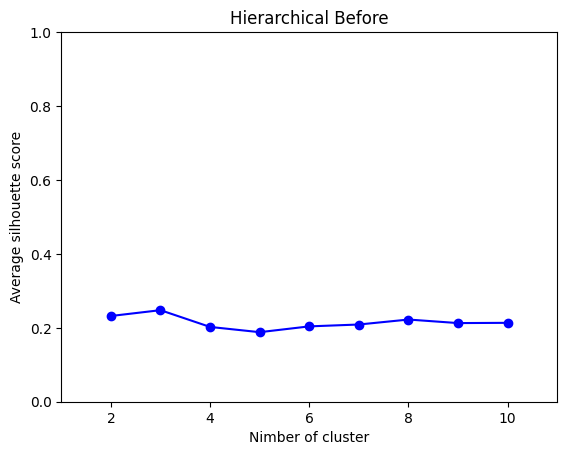

In [10]:
import csv
import matplotlib.pyplot as plt

def plot_line_graph(file_path, x_axis_limit=None, y_axis_limit=None):
    x_values = []
    y_values = []

    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        next(reader, None)  # Skip the header row
        for row in reader:
            if row[0].strip() and row[1].strip():  # Check if both values are non-empty
                x_values.append(float(row[0]))
                y_values.append(float(row[1]))


    plt.plot(x_values, y_values, marker='o', linestyle='-', color='b')  # Adjust color and style as needed
    plt.title('Hierarchical Before')
    plt.xlabel('Nimber of cluster')
    plt.ylabel('Average silhouette score')

    if x_axis_limit is not None:
        plt.xlim(x_axis_limit)
    
    if y_axis_limit is not None:
        plt.ylim(y_axis_limit)

    plt.show()

csv_file_path = '../Results/Hierarchical/HierarchicalBefore/Hierarchical_beforeDS_TotalResult.csv' 
x_limit = (1, 11)  # Specify the desired x-axis limits
y_limit = (0, 1)  # Specify the desired y-axis limits
plot_line_graph(csv_file_path, x_axis_limit=x_limit, y_axis_limit=y_limit)
